<a href="https://colab.research.google.com/github/arnauldmwafise/arnauldmwafise/blob/main/Algorithmic_Matrix_Frameworks_For_Poset_Isomorphism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook implements, in Python, the algorithms proposed in the paper “**Algorithmic Matrix Framework For Poset Isomorphism Analysis**.”

This notebook implements, in Python, the algorithms proposed in the paper “**Algorithmic Matrix Framework For Poset Isomorphism Analysis**.”

To test for poset isomorphism, we first establish a baseline using standard NetworkX graph algorithms, followed by a naive permutation-based approach. Finally, we introduce a new method that implements algorithms based on the semi-equidual structural properties of poset matrices.

This notebook implements, in Python, the algorithms proposed in the paper “**Algorithmic Matrix Framework For Poset Isomorphism Analysis**.”

This notebook implements, in Python, the algorithms proposed in the paper “**Algorithmic Matrix Framework For Poset Isomorphism Analysis**.”

In [ ]:
# import  packages
import numpy as np
import itertools
import more_itertools
from itertools import compress
import math
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

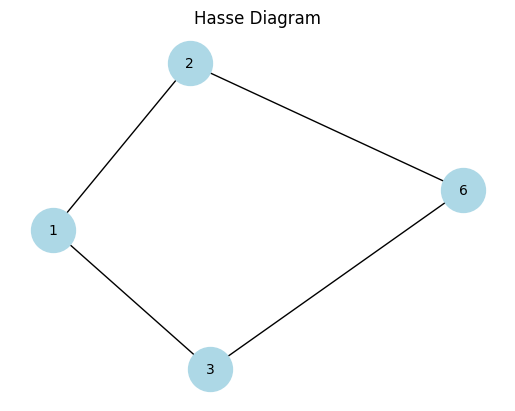

In [ ]:
def visualize_poset_from_lower_triangular_matrix(matrix, labels=None):
    """
    Visualizes the Hasse diagram of a poset represented by a lower triangular matrix.

    Args:
        matrix (np.array): A square lower triangular NumPy array where matrix[i, j] = 1
                           if element i <= element j in the poset, and 0 otherwise.
                           The matrix represents the partial order relation.
        labels (list, optional): A list of labels for each element in the poset.
                                 If None, default numerical labels will be used.
    """

    num_elements = matrix.shape[0]
    if labels is None:
        labels = [str(i) for i in range(num_elements)]
    elif len(labels) != num_elements:
        raise ValueError("Number of labels must match the number of elements in the matrix.")

    G = nx.DiGraph()

    # Add nodes with labels
    for i in range(num_elements):
        G.add_node(i, label=labels[i])

    # Add edges based on the direct covering relation (remove transitivity)
    for i in range(num_elements):
        for j in range(i + 1, num_elements):  # Iterate only upper triangle for potential relations
            if matrix[j, i] == 1:  # Check if j covers i
                is_direct_cover = True
                for k in range(num_elements):
                    if k != i and k != j and matrix[j, k] == 1 and matrix[k, i] == 1:
                        is_direct_cover = False
                        break
                if is_direct_cover:
                    G.add_edge(i, j)  # Edge from covered to covering element

    # Draw the Hasse diagram
    pos = nx.spring_layout(G)  # You can choose other layout algorithms
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
    nx.draw_networkx_edges(G, pos, arrows=False)  # Hasse diagrams typically omit arrows
    nx.draw_networkx_labels(G, pos, labels={i: G.nodes[i]['label'] for i in G.nodes()}, font_size=10)

    plt.title("Hasse Diagram")
    plt.axis('off')  # Hide axes
    plt.show()

# Example Usage:
# Define a lower triangular matrix representing a poset (e.g., divisibility on {1, 2, 3, 6})
# Matrix[i, j] = 1 if element i divides element j, and 0 otherwise.
# Elements: 1, 2, 3, 6
# Index mapping: 0->1, 1->2, 2->3, 3->6
poset_matrix = np.array([
    [1, 0, 0, 0],  # 1
    [1, 1, 0, 0],  # 2
    [1, 0, 1, 0],  # 3
    [1, 1, 1, 1]   # 6
])

poset_labels = ["1", "2", "3", "6"]

visualize_poset_from_lower_triangular_matrix(poset_matrix, labels=poset_labels)

In [ ]:
def generate_consecutive_strings(n):
    """
    Generates a list of consecutive numbers as strings from '1' up to 'n'.

    Args:
        n (int): The upper limit (inclusive) for the number sequence.

    Returns:
        list: A list of strings, e.g., ['1', '2', ..., 'n'].
    """
    if not isinstance(n, int) or n < 1:
        # Optional: Add error handling for invalid input
        raise ValueError("Input 'n' must be a positive integer.")

    # Use of a list comprehension to efficiently create the list
    # range(1, n + 1) generates integers from 1 up to and including n
    # str(i) converts each integer to a string
    return [str(i) for i in range(1, n + 1)]


**Example of Non Semi-Equidual Poset Matrix**

In [ ]:
pm_nsm=np.array([[1, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0],
           [1, 1, 1, 1, 0, 0],
           [1, 1, 1, 1, 1, 0],
           [1, 1, 1, 0, 0, 1]])

In [ ]:
# Calculate the sum of all elements
total_sum = np.sum(pm_nsm)
print(total_sum)

16


In [ ]:
poset_labels=generate_consecutive_strings(pm_nsm.shape[0])

In [ ]:
poset_labels

['1', '2', '3', '4', '5', '6']

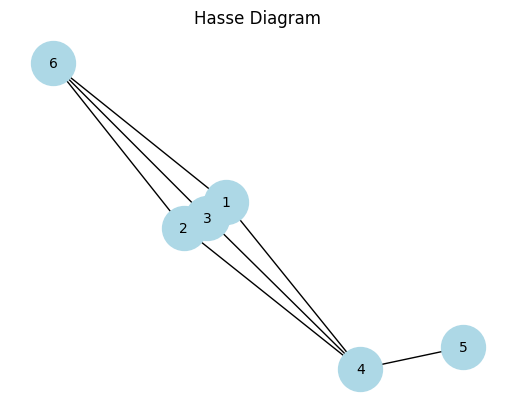

In [ ]:
visualize_poset_from_lower_triangular_matrix(pm_nsm, labels=poset_labels)

In [ ]:
#non isomorphic example of pm_nsm
non_isomorphic_pm_nsm=np.array([[1, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0],
           [1, 0, 1, 0, 0, 0],
           [1, 0, 0, 1, 0, 0],
           [1, 1, 1, 1, 1, 0],
           [1, 1, 1, 0, 0, 1]])

In [ ]:
# Calculate the sum of all elements
total_sum = np.sum(non_isomorphic_pm_nsm)
print(total_sum)

16


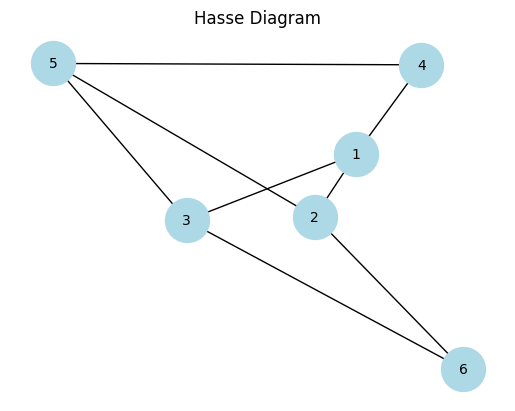

In [ ]:
visualize_poset_from_lower_triangular_matrix(non_isomorphic_pm_nsm, labels=poset_labels)

In [ ]:
isomorphic_pm_nsm1=np.array([[1, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0],
           [1, 1, 1, 1, 0, 0],
           [1, 1, 1, 0, 1, 0],
           [1, 1, 1, 0, 1, 1]])

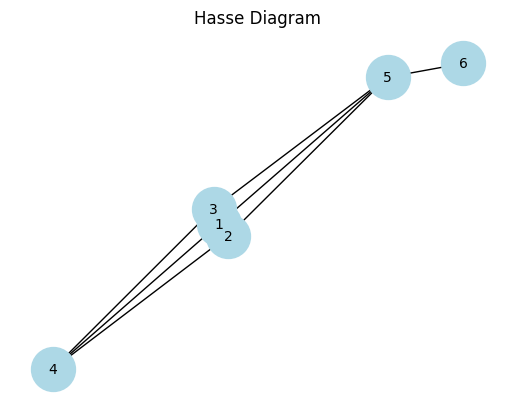

In [ ]:
visualize_poset_from_lower_triangular_matrix(isomorphic_pm_nsm1, labels=poset_labels)

Based on standard graph algorithms, the approach below serves as the baseline for matrix isomorphism testing. NetworkX primarily employs the VF2 algorithm, along with its enhanced counterpart VF2++, to determine graph isomorphism.

In [ ]:
def are_isomorphic_matrices(matrix1,matrix2):
     """Using the graph algorithms from Networkx"""

     graphA = nx.from_numpy_array(matrix1)
     graphB= nx.from_numpy_array(matrix2)

     return nx.is_isomorphic(graphA, graphB)


In [ ]:
are_isomorphic_matrices(isomorphic_pm_nsm1,pm_nsm)

True

In [ ]:
are_isomorphic_matrices(non_isomorphic_pm_nsm,pm_nsm)

False

**dualize** function transforms a poset matrix to its dual representation

In [ ]:
def dualize(posetmatrix):
  """
    Transforms a poset matrix (incidence matrix) into its dual
    by transposing it.

    Parameters:
    posetmatrix (list of lists or np.array): Square matrix where M[i][j] = 1
                                        if i <= j, else 0.

    Returns:
    np.array: The dual poset matrix.
  """

  dimPoset=posetmatrix.shape[0]
  dualmatrix = np.zeros((dimPoset,dimPoset),int)

  for s in range(dimPoset):
     for r in range(dimPoset):
        dualmatrix[s,r]=posetmatrix[dimPoset-r-1,dimPoset-s-1]

  return dualmatrix

**typeOfduality** function determines if a poset matrix is self dualizable by returning False or non-self dualizable by returning True.

In [ ]:
def typeOfduality(posetmatrix):
    """
    Check if a poset matrix is not self-dual.

    This function determines if the dual of a poset matrix differs from the
    original matrix. It serves as a Boolean test for self-duality using
    numerical comparison.

    Args:
        posetmatrix (ndarray): An $n \times n$ 2D NumPy array representing
            the poset.

    Returns:
        bool: True if the matrix is NOT self-dual (i.e., its dual is
            different); False if the matrix is self-dual (i.e., it is
            equivalent to its dual).
    """

    if np.allclose(dualize(posetmatrix),posetmatrix):
        return False
    else:
        return True

**Minimal/Maximal Element Identification**: The structure must enable the identification of maximal elements (rows with zero entries execept at the entry on the main diagonal) and minimal elements (columns with zero entries execept at the entry on the main diagonal).

In [ ]:
def get_minimal_elements(posetmatrix):
    """
    Identify the indices of all minimal elements in a poset matrix.

    In a poset matrix $M$ where $M_{ij} = 1$ if $x_i \le x_j$, an element $x_i$
    is minimal if it is not preceded by any other element. In matrix terms,
    this corresponds to a row sum of exactly 1 (representing the reflexive
    relation $x_i \le x_i$ only).

    Args:
        poset_matrix (ndarray): An $n \times n$ 2D NumPy array representing
            the poset relation.

    Returns:
        list[int]: A list of integers representing the row indices of the
            minimal elements.
    """

    dimPM=posetmatrix.shape[0]
    minList=[ind for ind in range(dimPM) if sum(posetmatrix[ind])==1 ]


    return minList

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2830242952.py:5: SyntaxWarning: invalid escape sequence '\l'
  In a poset matrix $M$ where $M_{ij} = 1$ if $x_i \le x_j$, an element $x_i$


In [ ]:
def  get_maximal_elements(posetmatrix):
    """
    Identify the indices of all maximal elements in a poset matrix.

    In a poset matrix $M$ where $M_{ij} = 1$ if $x_i \le x_j$, an element $x_j$
    is maximal if it does not precede any other element. In matrix terms,
    this corresponds to a column sum of exactly 1 (representing the reflexive
    relation $x_j \le x_j$ only).

    Args:
        poset_matrix (ndarray): An $n \times n$ 2D NumPy array representing
            the poset relation.

    Returns:
        list[int]: A list of integers representing the column indices of the
            maximal elements.
    """
    dimPM=posetmatrix.shape[0]
    maxList=[x for x in range(dimPM) if sum(posetmatrix[:,x])==1]

    return maxList

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-531017922.py:5: SyntaxWarning: invalid escape sequence '\l'
  In a poset matrix $M$ where $M_{ij} = 1$ if $x_i \le x_j$, an element $x_j$


In [ ]:
def isUnitMatrix(posetmatrix):
    """Determines if a poset matrix is a unit matrix"""
    if np.all(posetmatrix== 1) and posetmatrix.shape[0]==1:
        return True
    else:
        return False

NetworkX uses Breadth-First Search (BFS) traversal for testing graph connectivity in undirected graphs. The computational complexity for these functions is O(n + m), where n is the number of nodes (vertices) and m is the number of edges. The method that follows established the connectivity status of poset matrices using the NetworkX library.

In [ ]:
def isConnected(posetmatrix):
    """
    Determines if a poset matrix is associated with a connected poset using NetworkX library.

    Args:
        poset_matrix: A square 2D list or numpy array representing the
                      poset's adjacency (or reachability) matrix.

    Returns:
        bool: True if the poset is connected, False otherwise.
    """

    if posetmatrix.shape[0]==0:
        return False

    if posetmatrix.shape[0]==1:
        return isUnitMatrix(posetmatrix)

    else:

        graph = nx.from_numpy_array(posetmatrix)
        is_connected = nx.is_connected(graph)
        return is_connected

# Use isSemiRight to determine if a poset matrix satisfies the conditions for **semi-right dualizability** within the broader **semi-equidualizable** classification.

In [ ]:
def isSemiRight(posetmatrix):
    """
    Determine if a poset matrix is semi-right dualizable.

    A poset matrix $PM$ of size $n \times n$ is classified as semi-right
    dualizable based on the structure of its leading columns and the
    resulting subposet matrix.

    Let $d$ represent the number of consecutive columns, starting from
    the first column, where all entries below the main diagonal are
    equal to 1. $PM$ is semi-right dualizable if the subposet matrix
    $PM[d+1, \dots, n]$ of size $(n-d) \times (n-d)$ is:
    1. A disconnected poset matrix, and
    2. Not self-dualizable.

    Args:
        poset_matrix (ndarray): An $n \times n$ matrix representing the poset.

    Returns:
        bool: True if the matrix is identified as semi-right dualizable,
            False otherwise.
    """

    dimposetmatrix=posetmatrix.shape[0]
    i,depth1=0,0
    while i<dimposetmatrix:
        if  all(posetmatrix[i:,i]):
            depth1=depth1+1
            i=i+1
        else:
            break
    if (depth1>0 and not isConnected(posetmatrix[depth1:,depth1:]) and not np.allclose(dualize(posetmatrix[depth1:,depth1:]),posetmatrix[depth1:,depth1:])):
        return True
    else:
        return False

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3323017944.py:12: SyntaxWarning: invalid escape sequence '\d'
  $PM[d+1, \dots, n]$ of size $(n-d) \times (n-d)$ is:


## The isSemiLeft function evaluates whether a poset matrix is **semi-left dualizabl**e, which is a specific subcategory of **semi-equidualizable matrices**.

In [ ]:
def isSemiLeft(posetmatrix):
    """
    Determine if a poset matrix is semi-left dualizable.

    A poset matrix $PM$ of size $n \times n$ is identified as semi-left dualizable
    based on the properties of its subposet matrix.

    Let $d$ represent the number of consecutive rows, counting upward from the
    last row, where all entries below the main diagonal are equal to 1.
    The matrix $PM$ is semi-left dualizable if the subposet matrix
    $PM[1, \dots, n-d]$ of size $(n-d) \times (n-d)$ is:
    1. Disconnected, and
    2. Not self-dualizable.

    Args:
        poset_matrix (ndarray): An $n \times n$ matrix representing the poset.

    Returns:
        bool: True if the matrix satisfies the semi-left dualizable criteria,
            False otherwise.
    """

    dimposetmatrix=posetmatrix.shape[0]
    i,depth2=0,0

    while i<dimposetmatrix:
        if  all(posetmatrix[dimposetmatrix-i-1,:dimposetmatrix-i]):
            depth2=depth2+1
            i=i+1
        else:
            break
    else:
        depth2
    if (depth2>0 and not isConnected(posetmatrix[:-depth2,:-depth2]) and not np.allclose(dualize(posetmatrix[:-depth2,:-depth2]),posetmatrix[:-depth2,:-depth2])):
        return  True
    else:
        return False

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4092058234.py:11: SyntaxWarning: invalid escape sequence '\d'
  $PM[1, \dots, n-d]$ of size $(n-d) \times (n-d)$ is:


# The isDoubleDual function checks for the **double dualizable** property, one of the constituent categories defining a **semi-equidualizable** poset matrix.

In [ ]:
def isDoubleDual(posetmatrix):
    """
    Determine if a poset matrix is double dualizable.

    A poset matrix $PM$ of size $n \times n$ is classified as double dualizable
     if it contains both specific semi-right and semi-left dualizable sub-structures.

    Specifically, $PM$ must satisfy both of the following conditions:
    1. It contains an embedded semi-right dualizable subposet matrix of
       size $(n - 1) \times (n - 1)$.
    2. It contains an embedded semi-left dualizable subposet matrix of
       size $(n - 1) \times (n - 1)$.

    Args:
        poset_matrix (ndarray): An $n \times n$ matrix representing the poset.

    Returns:
        bool: True if the matrix is identified as double dualizable,
            False otherwise.
    """


    last_row=posetmatrix[-1]
    first_col=posetmatrix[:,0]

    if np.allclose(last_row,first_col[::-1]) and len( get_maximal_elements(posetmatrix))==len(get_minimal_elements(posetmatrix)):
        x=posetmatrix[:-1,:-1]
        y=posetmatrix[1:,1:]

        if isSemiRight(x) and isSemiLeft(y) and np.allclose(x[1:,1:],y[:-1,:-1]):
            return True
        else:
            return False
    else:
        return False

In [ ]:
def isSemiEquidualizable(posetmatrix):
    """
    Determine if a poset matrix is semi-equidualizable.

    A poset matrix is considered semi-equidualizable if it satisfies the
    criteria for any of the following dualizability classifications:
    - Semi-right dualizable
    - Semi-left dualizable
    - Double dualizable

    Args:
        matrix (ndarray): The poset matrix to be evaluated.

    Returns:
        bool: True if the matrix falls into at least one of the three
            dualizable categories; False otherwise.
    """

    if isSemiLeft(posetmatrix) or isSemiRight(posetmatrix) or isDoubleDual(posetmatrix):
        return True
    else:
        return False

In [ ]:
import numpy as np

def remove_array(list_of_arrays, array_to_remove):
    """
    Removes a NumPy array from a list of NumPy arrays.

    Args:
        list_of_arrays (list): A list of NumPy arrays.
        array_to_remove (np.ndarray): The NumPy array to remove.

    Returns:
        list: A new list with the specified array removed, or the original list if the array is not found.
    """
    new_list = [arr for arr in list_of_arrays if not np.array_equal(arr, array_to_remove)]
    if len(new_list) == len(list_of_arrays):
        print("Array not found in the list.")
    return new_list



In [ ]:
# Example usage:
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
array3 = np.array([1, 2, 3])
list_of_arrays = [array1, array2, array3]

new_list = remove_array(list_of_arrays, array1)
print(new_list)
# Output: [array([4, 5, 6]), array([1, 2, 3])]

new_list = remove_array(new_list, array1)
print(new_list)
# Output: [array([4, 5, 6])]

[array([4, 5, 6])]
Array not found in the list.
[array([4, 5, 6])]


In [ ]:
import numpy as np

def remove_sublist(list_of_arrays, sublist_to_remove):
    """
    Removes a sublist of 2D numpy arrays from a list of 2D numpy arrays.

    Args:
        list_of_arrays: The original list of 2D numpy arrays.
        sublist_to_remove: The sublist of 2D numpy arrays to remove.

    Returns:
        A new list with the sublist removed.
    """
    new_list = [arr for arr in list_of_arrays if not any(np.array_equal(arr, x) for x in sublist_to_remove)]
    return new_list



In [ ]:
# Example Usage
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
arr3 = np.array([[1, 2], [3, 4]])
arr4 = np.array([[9, 10], [11, 12]])

list_of_arrays = [arr1, arr2, arr3, arr4]
sublist_to_remove = [arr1, arr3]

new_list = remove_sublist(list_of_arrays, sublist_to_remove)
print(new_list)
# Expected Output: [array([[5, 6], [7, 8]]), array([[ 9, 10], [11, 12]])]

[array([[5, 6],
       [7, 8]]), array([[ 9, 10],
       [11, 12]])]


In [ ]:
def apply_functions_list2(data_list, functions):
    """
    Applies a list of functions to a list, returning the name of the function
    that first returns True.

    Args:
    data_list: The list to apply the functions to.
    functions: A list of functions to apply.

    Returns:
    The name of the function that first returned True, or None if none did.
    """

    mklist1=[]
    for item in data_list:
        for function in functions:
            if function(item):
                mklist1.append(function.__name__) # Or function.__qualname__ for more details
                break
        else:
            mklist1.append("None")

    return mklist1






In [ ]:
def isDisconnected(posetmatrix):
    """
    Determine if a poset matrix represents a disconnected poset.

    A poset is considered disconnected if its underlying comparable
    graph (or Hasse diagram) consists of two or more disjoint components.
    In matrix terms, this typically implies that the matrix can be
    permuted into a block diagonal form.

    Args:
        poset_matrix (ndarray): An $n \times n$ matrix representing the poset.

    Returns:
        bool: True if the poset represented by the matrix is disconnected,
            False otherwise.
    """
    if not isConnected(posetmatrix):
        return True
    else:
        return False

In [ ]:
semiright_matrix=np.array([[1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 0],
       [1, 1, 0, 1, 1, 1]])

In [ ]:
semirightdd=np.array([[1,0,0,0],
 [0, 1 ,0 ,0],
 [0,1, 1, 0],
 [0, 1,1, 1]])

In [ ]:
semileft_matrix=dualize(semiright_matrix)

In [ ]:
semileft_matrix

array([[1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1]])

In [ ]:
semileftdd=semirightdd

In [ ]:
semileftdd

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 1]])

In [ ]:
doubledualex=np.array([[1, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0],
           [1, 0, 1, 0, 0, 0],
           [1, 0, 1, 1, 0, 0],
           [1, 0, 1, 1, 1, 0],
           [1, 1, 1, 1, 1, 1]])

In [ ]:
dd_matrix=np.array([[1, 0,0,0 ,0, 0 ,0, 0],
 [1, 1, 0, 0,0,0,0,0],
 [1, 1, 1, 0, 0, 0, 0, 0],
 [1, 1, 0,1, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 0,0],
 [1, 1, 0, 1, 1, 1,0,0],
 [1, 1, 1, 1, 1, 1, 1,0],
 [1, 1, 1 ,1, 1, 1, 1, 1]])

In [ ]:
dd_matrix

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1]])

**Take note depth1 is for the columns while depth2 is for the rows**

In [ ]:
def notSemidualizable(matrix):
    """
    Calculate the non-semi-equidualizable depth values for a poset matrix.

    This function performs the inverse logic of a semi-equidualizable check by
    identifying the semi-depth of leading columns and trailing rows that fail to
    meet the semi-equidualizability criteria (i.e., containing entries below the
    main diagonal that are all equal to 1).

    The function computes two specific depth values:
    1.  **depth1**: The count of consecutive columns, starting from the first
        column, that do not have all entries below the main diagonal equal to 1.
    2.  **depth2**: The count of consecutive rows, starting from the last
        row and moving upward, that do not have all entries below the main
        diagonal equal to 1.

    Args:
        matrix (ndarray): The $n \times n$ poset matrix to be evaluated.

    Returns:
        tuple (bool, int, int): A tuple containing:
            - **status** (bool): True if both `depth1` and `depth2` are greater
              than 0; False otherwise.
            - **depth1** (int): The non-semi-depth value for the columns.
            - **depth2** (int): The non-semi-depth value for the rows.
    """

    dim_matrix=matrix.shape[0]
    i,depth1=0,0
    j,depth2=0,0
    while i<dim_matrix:
        if not all(matrix[i:,i]):
            depth1=depth1+1
            i=i+1
        else:
            break

    while j<dim_matrix:
        if not all(matrix[dim_matrix-j-1,:dim_matrix-j]):
            depth2=depth2+1
            j=j+1
        else:
            break
    else:
        depth2

    if depth1>0 and depth2>0:
        return (True,depth1,depth2)
    else:
        return (False,depth1,depth2)



**Example Usage of the function notSemidualizable**

In [ ]:
matrixnsm=np.array([[1, 0, 0, 0, 0],
           [0, 1, 0, 0, 0],
           [0, 1, 1, 0, 0],
           [1, 1, 1, 1, 0],
           [1, 1, 1, 0, 1]])

In [ ]:
notSemidualizable(matrixnsm)

(True, 1, 1)

In [ ]:
matrixnsm[1:matrixnsm.shape[0]-1,1:matrixnsm.shape[0]-1]

array([[1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])

In [ ]:
notSemidualizable(matrixnsm)[0]

True

In [ ]:
matrixnsm2=np.array([[1, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0],
           [1, 1, 1, 1, 0, 0],
           [1, 1, 1, 0, 1, 0],
           [1, 1, 1, 0, 1, 1]])

In [ ]:
notSemidualizable(matrixnsm2)[0]

True

In [ ]:
matrixnsm3=np.array([[1, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 0, 0],
           [0, 1, 1, 1, 0, 0],
           [1, 1, 1, 1, 1, 0],
           [1, 1, 1, 1, 0, 1]])

In [ ]:
notSemidualizable(matrixnsm3)

(True, 2, 1)

In [ ]:
notmatrixnsm=np.array([[1, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0],
           [1, 1, 0, 1, 0, 0],
           [1, 1, 0, 0, 1, 0],
           [1, 1, 1, 1, 1, 1]])

In [ ]:
notSemidualizable(notmatrixnsm)

(False, 0, 0)

In [ ]:
def is_identity_chain_posetmatrix(matrix):
    """
    Check if a matrix is equivalent to a chain poset matrix or an identity matrix.

    This function utilizes the sum of matrix entries to identify specific
    poset structures. The sum of consecutive integers $1 + 2 + 3 + \dots + n$
    is calculated using the formula $\frac{n(n+1)}{2}$.

    The matrix is classified based on the following structural sums:
    1.  **Chain Poset Matrix**: A unit lower triangular matrix (all entries on
        and below the main diagonal are 1, and 0 elsewhere). The sum of its
        entries equals $\frac{n(n+1)}{2}$.
    2.  **Identity Matrix**: A matrix where only the main diagonal entries are 1.
        The sum of its entries equals $n$ (the number of rows/columns).

    Args:
        matrix (ndarray): A 2D NumPy array with integer entries representing
            the nxn matrix.

    Returns:
        bool: True if the sum of the matrix entries matches the expected sum
            for either a chain poset matrix or an identity matrix; False otherwise.
    """
    n=matrix.shape[0]
    test=int((n*(n+1))/2)#calculates sum of consecutive integers
    if np.sum(matrix)==test or np.sum(matrix)==n:
        return True
    else:
        return False


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2307236495.py:6: SyntaxWarning: invalid escape sequence '\d'
  poset structures. The sum of consecutive integers $1 + 2 + 3 + \dots + n$


**Example Usage**

In [ ]:
chain_poset1=np.array([[1,0,0],[1,1,0],[1,1,1]])

In [ ]:
is_identity_chain_posetmatrix(chain_poset1)

True

In [ ]:
notchain1=np.array([[1,0,0],[1,1,0],[1,0,1]])

In [ ]:
is_identity_chain_posetmatrix(notchain1)

False

In [ ]:
identity1=np.array([[1,0,0],[0,1,0],[0,0,1]])

In [ ]:
is_identity_chain_posetmatrix(identity1)

True

In [ ]:
def doubledual_to_semileft(matrix,depth1,depth2):
    """
    Transform a double dualizable poset matrix into a semi-left dualizable matrix.

    This function performs a structural transformation on a matrix classified as
    double dualizable to satisfy the specific criteria of a semi-left
    dualizable poset matrix, utilizing pre-calculated depth values.

    Args:
        matrix (ndarray): A 2D NumPy array representing the $n \times n$
            double dualizable poset matrix.
        depth1 (int): The semi-depth value calculated from the leading columns
            (consecutive columns starting from the first with entries below
            the main diagonal equal to 1).
        depth2 (int): The semi-depth value calculated from the trailing rows
            (consecutive rows starting from the last with entries below
            the main diagonal equal to 1).

    Returns:
        ndarray: A 2D NumPy array representing the resulting semi-left
            dualizable poset matrix.
    """

    len_matrix=matrix.shape[0]
    fittings=[]
    depth=depth1+depth2
    for s in range(depth-1,-1,-1):
        ones_list = [1]*(len_matrix-s)
        zeros_list = [0]*s
        comblist=ones_list + zeros_list
        fittings.append(comblist)
    fittings_2darray=np.array(fittings)
    matrixdisc=matrix[depth1:matrix.shape[0]-depth2,depth1:matrix.shape[0]-depth2] #retrieves the (len_matrix-depth1)x(len_matrix-depth1) disconnected adjacency matrix
    col_zero_array_2d = np.zeros((matrixdisc.shape[0],(depth1+depth2) ),dtype=int)
    row_zero_array_2d = np.zeros(((depth1+depth2),matrixdisc.shape[0] ),dtype=int)
    zerosmatrixdisc=np.concatenate((row_zero_array_2d,matrixdisc),dtype=int,axis=0)
    matrixdisczeros=np.concatenate((matrixdisc,col_zero_array_2d),dtype=int,axis=1)
    semileft_matrix=np.concatenate((matrixdisczeros,fittings_2darray),dtype=int,axis=0)


    return semileft_matrix




In [ ]:
doubledual_to_semileft(doubledualex,1,1)

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1]])

In [ ]:
def doubledual_to_semiright(matrix,depth1,depth2):
    """
    Transform a double dualizable poset matrix into a semi-right dualizable poset matrix.

    This function performs a structural transformation on a matrix classified as
    double dualizable to satisfy the specific criteria of a semi-right
    dualizable poset matrix, utilizing pre-calculated semi-depth values.

    Args:
        matrix (ndarray): A 2D NumPy array representing the $n \times n$
            double dualizable poset matrix.
        depth1 (int): The semi-depth value calculated from the leading columns
            (consecutive columns starting from the first with entries below
            the main diagonal equal to 1).
        depth2 (int): The semi-depth value calculated from the trailing rows
            (consecutive rows starting from the last with entries below
            the main diagonal equal to 1).

    Returns:
        ndarray: A 2D NumPy array representing the resulting semi-right
            dualizable poset matrix.
    """

    len_matrix=matrix.shape[0]
    fittings=[]
    depth=depth1+depth2
    for s in range(depth):
        ones_list = [1]*(len_matrix-s)
        zeros_list = [0]*s
        comblist= zeros_list+ones_list
        fittings.append(comblist)
    fittings_2darray=np.transpose(np.array(fittings))
    matrixdisc=matrix[depth1:matrix.shape[0]-depth2,depth1:matrix.shape[0]-depth2]#computes (len_matrix-depth1)x(len_matrix-depth1)disconnected matrix
    row_zero_array_2d = np.zeros(((depth1+depth2),matrixdisc.shape[0] ),dtype=int)
    zerosmatrixdisc=np.concatenate((row_zero_array_2d,matrixdisc),dtype=int,axis=0)
    semiright_matrix=np.concatenate((fittings_2darray, zerosmatrixdisc),dtype=int,axis=1)

    return   semiright_matrix


In [ ]:
doubledual_to_semiright(doubledualex,1,1)

array([[1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 0],
       [1, 1, 0, 1, 1, 1]])

In [ ]:
def semileft_to_doubledual(matrix,row_depth):
    """
    Transform a semi-left dualizable poset matrix into a double dualizable matrix.

    This function modifies the structure of a semi-left dualizable matrix to
    satisfy the additional requirements of a double dualizable poset matrix,
    guided by the calculated row depth.

    Args:
        matrix (ndarray): A 2D NumPy array representing the $n \times n$
            semi-left dualizable poset matrix.
        row_depth (int): The semi-depth calculated from the trailing rows
            (the number of consecutive rows starting from the last row
            whose entries below the main diagonal are all 1).

    Returns:
        ndarray: A 2D NumPy array representing the resulting double dualizable
            poset matrix.
    """

    cutpt=int(row_depth/2)
    fittings=[]
    disconnmat=matrix[:-row_depth,:-row_depth]
    for t in range(cutpt-1,-1,-1):
        ones_list = [1]*(matrix.shape[1]-t)
        zeros_list = [0]*t
        comblist=ones_list + zeros_list
        fittings.append(comblist)
    zeros_top_disconmat=np.zeros((cutpt,disconnmat.shape[0]),dtype=int)
    disconnmatzeros=np.concatenate((zeros_top_disconmat,disconnmat),dtype=int,axis=0)
    fittings_colarray=np.transpose(np.array(fittings))
    leftconstruct=np.concatenate((fittings_colarray[0:fittings_colarray.shape[0]-cutpt,:],disconnmatzeros),axis=1)
    leftzeros=np.zeros((leftconstruct.shape[0],cutpt),dtype=int)
    leftconstruct_leftzeros=np.concatenate((leftconstruct,leftzeros),dtype=int,axis=1)
    bottom_fittingsarray=np.array(fittings)
    doubledual_matrix=np.concatenate((leftconstruct_leftzeros,bottom_fittingsarray),dtype=int,axis=0)

    return doubledual_matrix

In [ ]:
semileft_matrix=np.array([[1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1]])

In [ ]:
semileft_to_doubledual(semileft_matrix,2)

array([[1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1]])

In [ ]:
def semiright_to_doubledual(matrix,row_depth):
    """
    Transform a semi-right dualizable poset matrix into a double dualizable matrix.

    This function utilizes the logic of `semileft_to_doubledual` by first dualizing
    the semi-right poset matrix into a semi-left representation and subsequently
    transforming that result into a double dualizable poset matrix.

    Args:
        matrix (ndarray): A 2D NumPy array representing the $n \times n$
            semi-right dualizable poset matrix.
        row_depth (int): The semi-depth calculated from the trailing rows
            of the intermediate semi-left representation (the number of
            consecutive rows starting from the last row whose entries
            below the main diagonal are all 1).

    Returns:
        ndarray: A 2D NumPy array representing the resulting double dualizable
            poset matrix.
    """
    matrix=dualize(matrix)
    cutpt=int(row_depth/2)
    fittings=[]
    disconnmat=matrix[:-row_depth,:-row_depth]
    for t in range(cutpt-1,-1,-1):
        ones_list = [1]*(matrix.shape[1]-t)
        zeros_list = [0]*t
        comblist=ones_list + zeros_list
        fittings.append(comblist)
    zeros_top_disconmat=np.zeros((cutpt,disconnmat.shape[0]),dtype=int)
    disconnmatzeros=np.concatenate((zeros_top_disconmat,disconnmat),dtype=int,axis=0)
    fittings_colarray=np.transpose(np.array(fittings))
    leftconstruct=np.concatenate((fittings_colarray[0:fittings_colarray.shape[0]-cutpt,:],disconnmatzeros),axis=1)
    leftzeros=np.zeros((leftconstruct.shape[0],cutpt),dtype=int)
    leftconstruct_leftzeros=np.concatenate((leftconstruct,leftzeros),dtype=int,axis=1)
    bottom_fittingsarray=np.array(fittings)
    doubledual_matrix=np.concatenate((leftconstruct_leftzeros,bottom_fittingsarray),dtype=int,axis=0)

    return doubledual_matrix

In [ ]:
def is_not_identity_chain_posetmatrix(matrix):
    """
    Verify if a matrix is neither a chain poset matrix nor an identity matrix.

    This function implements the inverse logic of `is_identity_chain`. It evaluates
    the sum of all matrix entries against known structural constants derived from
    arithmetic series.

    The sum of consecutive integers $1 + 2 + 3 + \dots + n$ is given by the
    formula $\frac{n(n+1)}{2}$. The matrix is identified as "not an identity
    or chain poset" if its total sum fails to match both of the following:
    1.  **Chain Poset Matrix Sum**: $\frac{n(n+1)}{2}$ (representing a unit lower
        triangular matrix with all ones on and below the main diagonal).
    2.  **Identity Matrix Sum**: $n$ (where $n$ is the number of rows or columns).

    Args:
        matrix (ndarray): A 2D NumPy array with integer entries representing
            the $n \times n$ matrix.

    Returns:
        bool: True if the matrix sum does not equal $n$ and does not
            equal $\frac{n(n+1)}{2}$; False otherwise.
    """
    n=matrix.shape[0]
    test=int((n*(n+1))/2)#calculates sum of consecutive integers
    if not np.sum(matrix)==test and not np.sum(matrix)==n:
        return True
    else:
        return False


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-46864875.py:9: SyntaxWarning: invalid escape sequence '\d'
  The sum of consecutive integers $1 + 2 + 3 + \dots + n$ is given by the


In [ ]:
Nested1=np.array([[1,0,0,0,0,0],[1,1,0,0,0,0],[1,1,1,0,0,0],[1,0,0,1,0,0],[1,0,0,1,1,0],[1,0,0,1,0,1]])

In [ ]:
Nested1

array([[1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 1]])

In [ ]:
def generate_disconn_depth(posetmatrix):
    """
    Extract the principal disconnected subposet matrix and its associated semi-depths.

    This function retrieves the core disconnected submatrix from a given poset matrix
    by identifying the structural semi-depths of its rows and columns. The structure
    of the returned metadata depends on the dualizability type of the input matrix.

    Args:
        posetmatrix (ndarray): A 2D NumPy array representing the nxn
            poset matrix to be analyzed.

    Returns:
        tuple[ndarray, dict]: A tuple containing:
            - **principal_submatrix** (ndarray): The extracted principal disconnected
              subposet matrix.
            - **metadata** (dict): A dictionary containing the identified depth(s).
              The dictionary format varies by matrix type:
                * **Double Dualizable**: Returns `{"depth1,depth2": (depth1, depth2)}`.
                * **Semi-Right Dualizable**: Returns `{"depth1": depth1}` (column depth).
                * **Semi-Left Dualizable**: Returns `{"depth2": depth2}` (row depth).
    """
    dimposetmatrix=posetmatrix.shape[0]
    i,depth1=0,0
    j,depth2=0,0

    while i<dimposetmatrix:
        if  all(posetmatrix[i:,i]):
            depth1=depth1+1
            i=i+1
        else:
            break
    while j<dimposetmatrix:
        if  all(posetmatrix[dimposetmatrix-j-1,:dimposetmatrix-j]):
            depth2=depth2+1
            j=j+1
        else:
            break
    else:
        depth2

    if depth2>0 and depth1>0 and depth1==depth2 and len( get_maximal_elements(posetmatrix))==len(get_minimal_elements(posetmatrix)):

        disconn_mat3=posetmatrix[depth1:posetmatrix.shape[0]-depth2,depth1:posetmatrix.shape[0]-depth2]
        dd_disconnect=(disconn_mat3,{"depth1,depth2":(depth1,depth2)})
        return dd_disconnect

    if (depth1>0 and not isConnected(posetmatrix[depth1:,depth1:])):
        disconn_mat1=posetmatrix[depth1:,depth1:]
        sr_disconnect=(disconn_mat1,{"depth1":depth1})
        return sr_disconnect

    if (depth2>0 and not isConnected(posetmatrix[:-depth2,:-depth2])):
        disconn_mat2=posetmatrix[:-depth2,:-depth2]
        sl_disconnect=(disconn_mat2,{"depth2":depth2})
        return sl_disconnect




In [ ]:
def submatrices_from_disconnposetmat2(posetmatrix):
    """
    Extract and collect connected submatrices from a semi-equidualizable poset matrix.

    This function identifies the primary disconnected core of a semi-equidualizable
    poset matrix and then decomposes that core into its constituent connected
    sub-structures using graph-theoretic connectivity.

    Args:
        posetmatrix (ndarray): A 2D NumPy array representing a semi-equidualizable
            poset matrix.

    Returns:
        tuple (list[tuple], list[ndarray]): A tuple containing:
            - **paired_matrices** (list[tuple]): A list of tuples, where each tuple
              pairs the original input matrix with one of its extracted connected
              submatrices.
            - **submatrices_list** (list[ndarray]): A standalone collection of the
              extracted connected submatrices.
    """

    disconn_matrix=generate_disconn_depth(posetmatrix)[0]
    graph_disconn_matrix = nx.from_numpy_array(disconn_matrix)
    #gets the connected points from a disconnected matrix
    tuple_connected_indices=tuple(nx.connected_components(graph_disconn_matrix))
    #converts the tuple of connected points into a list of connected points
    list_connected_indices=list(map(sorted,tuple_connected_indices))
    #takes those list of connected points and converst into 2D array
    submatriceslst=list(map(extract_connected_submatrices,list_connected_indices,[disconn_matrix]*(len(list_connected_indices))))

    return list(zip([posetmatrix]*len(submatriceslst),submatriceslst)),submatriceslst

In [ ]:
def decompose_poset_hierarchy(posetmatrix):
    """
    This functions generates a collection of the submatrices associated to all the general
    semi-equidualizable(self,nonself dual) poset matrices that are embedded within ageneral semi-equidualizable(self,non-self dual)
     Args:
       poset matrix: 2d numpy array
     Returns:
        Nested list of list of submatrices which do not contain any chains or antichain posets.
    """

    running=True
    nestedlst=[]
    i=0
    while running:
        if i==0:
            submatrices1=submatrices_from_disconnposetmat2(posetmatrix)
            nestedlst.append(submatrices1)
            filterlst1=list(filter(is_not_identity_chain_posetmatrix, nestedlst[-1][1]))
            if filterlst1:
               i=i+1
            else:
                running=False
        if i>0:
            if i==1:
                filterlst2=list(filter(is_not_identity_chain_posetmatrix,filterlst1))#allows for the use of previously calculated value at i=0
            else:
                listcomp=[ submatrices2[num][-1] for num in range(len(submatrices2))]
                flat_list = list(itertools.chain.from_iterable(listcomp))
                filterlst2=list(filter(is_not_identity_chain_posetmatrix,flat_list))#uses the values after i>1
            if filterlst2:
                i=i+1
            else:
                running=False
            submatrices2=list(map(submatrices_from_disconnposetmat2,filterlst2))
            if  submatrices2:
                nestedlst.append(submatrices2)#extract the tuple from the list and add to nestedlst

    return nestedlst


In [ ]:
nested2=np.array([[1, 0, 0, 0, 0, 0,0,0,0],
           [1, 1, 0, 0, 0, 0,0,0,0],
           [1, 1, 1, 0, 0, 0,0,0,0],
           [1, 0, 0, 1, 0, 0,0,0,0],
           [1, 0, 0, 1, 1, 0,0,0,0],
           [1, 0, 0, 1, 0, 1,0,0,0],[1,0,0,0,0,0,1,0,0],[1,0,0,0,0,0,0,1,0],[1,0,0,0,0,0,1,1,1]])

In [ ]:
decompose_poset_hierarchy(nested2)

[([(array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 1, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 1, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 1, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 1, 0],
           [1, 0, 0, 0, 0, 0, 1, 1, 1]]),
    array([[1, 0],
           [1, 1]])),
   (array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 1, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 1, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 1, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 1, 0],
           [1, 0, 0, 0, 0, 0, 1, 1, 1]]),
    array([[1, 0, 0],
           [1, 1, 0],
           [1, 0, 1]])),
   (array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 0, 0, 0, 0],
      

In [ ]:
Nested1

array([[1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 1]])

In [ ]:
decompose_poset_hierarchy(Nested1)

[([(array([[1, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0],
           [1, 0, 0, 1, 0, 0],
           [1, 0, 0, 1, 1, 0],
           [1, 0, 0, 1, 0, 1]]),
    array([[1, 0],
           [1, 1]])),
   (array([[1, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0],
           [1, 0, 0, 1, 0, 0],
           [1, 0, 0, 1, 1, 0],
           [1, 0, 0, 1, 0, 1]]),
    array([[1, 0, 0],
           [1, 1, 0],
           [1, 0, 1]]))],
  [array([[1, 0],
          [1, 1]]),
   array([[1, 0, 0],
          [1, 1, 0],
          [1, 0, 1]])]),
 [([(array([[1, 0, 0],
            [1, 1, 0],
            [1, 0, 1]]),
     array([[1]])),
    (array([[1, 0, 0],
            [1, 1, 0],
            [1, 0, 1]]),
     array([[1]]))],
   [array([[1]]), array([[1]])])]]

In [ ]:
nested6=np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]])

In [ ]:
decompose_poset_hierarchy(nested6)

[([(array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]]),
    array([[1, 0],
           [1, 1]])),
   (array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 

In [ ]:
nestedout6=decompose_poset_hierarchy(nested6)

In [ ]:
nested4=np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0,0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0,0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0,0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0,0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0,0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 1,0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0,1,0,0,0],[1, 0, 0, 0, 0, 0, 0, 0, 0,1,1,0,0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0,1,0,1,0],[1, 0, 0, 0, 0, 0, 0, 0, 0,1,0,1,1]])

In [ ]:
nestedout4=decompose_poset_hierarchy(nested4)

In [ ]:
nestedout4

[([(array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]]),
    array([[1, 0],
           [1, 1]])),
   (array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 

In [ ]:
nested5=np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,0],[1, 0, 0, 0, 0, 0, 0, 0, 0,1,0,1,0,1]])

In [ ]:
nestedout5=decompose_poset_hierarchy(nested5)

In [ ]:
nestedout5

[([(array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]]),
    array([[1, 0],
           [1, 1]])),
   (array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1

In [ ]:
def compare_unordered_lists2(list1, list2):
    """
    Compares two unordered lists of 2D NumPy arrays for equality.
    """
    if len(list1) != len(list2):
        return False

    # Convert each NumPy array to a hashable tuple representation
    def array_to_hashable(arr):
        return tuple(map(tuple, arr))

    # Create Counter objects for both lists using the hashable arrays
    counter1 = Counter(array_to_hashable(arr) for arr in list1)
    counter2 = Counter(array_to_hashable(arr) for arr in list2)

    # Compare the counters for equality
    return counter1 == counter2



In [ ]:
# Example 1: The lists are equal (same contents, different order)
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
arr4=np.array([[1,5, 6], [1,7, 8],[2,4,8]])
arr3 = np.array([[9, 10], [11, 12]])
arr5=np.array([[1]])

In [ ]:
list_w=[arr1,arr4,arr2]

In [ ]:
list_z=[arr4,arr1,arr2]

In [ ]:
list_y=[arr3,arr1,arr2]

In [ ]:
list_u=[arr5,arr4,arr2]

In [ ]:
list_v=[arr5,arr2,arr4]

In [ ]:
compare_unordered_lists2(list_w,list_z)

True

In [ ]:
compare_unordered_lists2(list_y,list_z)

False

In [ ]:
compare_unordered_lists2(list_u,list_v)

True

In [ ]:
def extract_connected_submatrices(list_of_indices,matrix):
    """
    Constructs a connected submatrix from a disconnected poset matrix.

    This function identifies the sub-structure of a disconnected poset by
    mapping a specific index set to their corresponding entries within the
    original matrix.

    Args:
        list_of_indices list[int]: contains the indices of a connected component
            relative to the original matrix.
        matrix (ndarray): The original $n \times n$ disconnected poset matrix
            from which the submatrix is derived.

    Returns:
        list[ndarray]: A matrix, where each matrix is a subposet matrix
            represents one of the connected component of the original poset.
    """
    if len(list_of_indices)==1:
        return matrix[0:1,0:1]
    else:
        return matrix[list_of_indices[0]:list_of_indices[len(list_of_indices)-1]+1,list_of_indices[0]:list_of_indices[len(list_of_indices)-1]+1]

In [ ]:
def  decompose_to_connected_submatrices(posetmatrix):
    """
    Decompose a disconnected poset matrix into its connected subposet matrices.

    This function identifies the disjoint components of a poset by treating
    the matrix as an adjacency representation of a graph. It extracts each
    connected component as a standalone submatrix.

    Args:
        posetmatrix (ndarray): An $n \times n$ 2D NumPy array representing
            a disconnected poset.

    Returns:
        list[ndarray]: A list of 2D NumPy arrays, where each array is a
            connected subposet matrix extracted from the original input.
    """
    pm_graph = nx.from_numpy_array(posetmatrix)
    listpts=tuple(nx.connected_components(pm_graph))
    listpts=list(map(sorted,listpts))
    matrix_lst=list(map(extract_connected_submatrices,listpts,[posetmatrix]*(len(listpts))))

    return  matrix_lst

In [ ]:
def  extract_semiequidual_subcomponents(posetmatrix):
    """
    Analyze a semi-equidual poset matrix and extract its internal sub-structures.

    This function identifies the structural semi-depths of a poset matrix and
    extracts the corresponding principal submatrix. Based on the connectivity
    of the result, it either returns the single connected submatrix or a
    collection of disconnected components.

    The extraction logic relies on two depth calculations:
    1.  **depth1**: The number of leading columns whose entries below the
        main diagonal are all 1.
    2.  **depth2**: The number of trailing rows whose entries below the
        main diagonal are all 1.

    Args:
        posetmatrix (ndarray): An $n \times n$ 2D NumPy array representing
            a semi-equidual poset.

    Returns:
        tuple or bool:
            - If depths are found: A tuple containing:
                - **submatrices** (ndarray or list[ndarray]): The resulting
                  submatrix or a list of connected components.
                - **status** (str): "connected" or "disconnected".
                - **depths** (tuple[int, int]): The calculated (depth1, depth2).
            - If no depths are identified (depth1=0, depth2=0) an indication that the input poset matrix
            is not semi-equidual: Returns False.
    """

    dimposetmatrix=posetmatrix.shape[0]
    i,depth1=0,0
    j,depth2=0,0
    while i<dimposetmatrix:
        if  all(posetmatrix[i:,i]):
            depth1=depth1+1
            i=i+1
        else:
            break
    while j<dimposetmatrix:
        if  all(posetmatrix[dimposetmatrix-j-1,:dimposetmatrix-j]):
            depth2=depth2+1
            j=j+1
        else:
            break
    else:
        depth2

    if depth2>0 and depth1>0 and depth1==depth2:

        submatrix=posetmatrix[depth1:posetmatrix.shape[0]-depth2,depth1:posetmatrix.shape[0]-depth2]
        if not isConnected(submatrix):
            list_connected_submatrices= decompose_to_connected_submatrices(submatrix)
            return (list_connected_submatrices,"disconnected",(depth1,depth2))
        else:
            #list_connected_submatrices= decompose_to_connected_submatrices(submatrix)
            return (submatrix,"connected",(depth1,depth2))


    if depth1>0 and depth2==0:
        submatrix=posetmatrix[depth1:,depth1:]
        if not isConnected(submatrix):
            list_connected_submatrices= decompose_to_connected_submatrices(submatrix)
            return  (list_connected_submatrices,"disconnected",(depth1,depth2))
        else:
            #list_connected_submatrices= decompose_to_connected_submatrices(submatrix)
            return (submatrix,"connected",(depth1,depth2))

    if depth2>0 and depth1==0:
        submatrix=posetmatrix[:-depth2,:-depth2]
        if not isConnected(submatrix):
            list_connected_submatrices= decompose_to_connected_submatrices(submatrix)
            return  (list_connected_submatrices,"disconnected",(depth1,depth2))
        else:
            list_connected_submatrices= decompose_to_connected_submatrices(submatrix)
            return (submatrix,"connected",(depth1,depth2))

    if depth2==0 and depth1==0:
        return False

In [ ]:
 extract_semiequidual_subcomponents(Nested1)

([array([[1, 0],
         [1, 1]]),
  array([[1, 0, 0],
         [1, 1, 0],
         [1, 0, 1]])],
 'disconnected',
 (1, 0))

In [ ]:
nested5

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]])

In [ ]:
 extract_semiequidual_subcomponents(nested5)

([array([[1, 0],
         [1, 1]]),
  array([[1, 0, 0],
         [1, 1, 0],
         [1, 0, 1]]),
  array([[1, 0, 0],
         [0, 1, 0],
         [1, 1, 1]]),
  array([[1, 0, 0, 0, 0],
         [1, 1, 0, 0, 0],
         [1, 0, 1, 0, 0],
         [1, 0, 1, 1, 0],
         [1, 0, 1, 0, 1]])],
 'disconnected',
 (1, 0))

In [ ]:
 extract_semiequidual_subcomponents(nested4)

([array([[1, 0],
         [1, 1]]),
  array([[1, 0, 0],
         [1, 1, 0],
         [1, 0, 1]]),
  array([[1, 0, 0],
         [0, 1, 0],
         [1, 1, 1]]),
  array([[1, 0, 0, 0],
         [1, 1, 0, 0],
         [1, 0, 1, 0],
         [1, 0, 1, 1]])],
 'disconnected',
 (1, 0))

# The function below is supposed to compute if you got that the not all depths on both sides is folled by a disconnected portion.

**WRITEUP CORRECT**

In [ ]:
def  analyze_non_semiequidual_structure(matrix):
    """
    Decompose a matrix using inverted semi-equidual depth logic.

    This function identifies the 'non-semi-depth' of a poset matrix by iterating
    through columns and rows that fail the semi-equidual criteria (i.e., containing
    at least one zero entry below the main diagonal). It extracts the resulting
    internal submatrix and classifies its components.

    The extraction logic is defined by:
    1.  **depth1 (Column Non-Depth)**: The number of consecutive columns,
        starting from the first, that contain at least one zero entry.
    2.  **depth2 (Row Non-Depth)**: The number of consecutive rows, starting
        from the last and moving upward, that contain at least one zero entry.

    Args:
        matrix (ndarray): An $n \times n$ 2D NumPy array representing the
            poset matrix to be analyzed.

    Returns:
        tuple or None:
            - If both `depth1` and `depth2` are greater than 0: A tuple containing:
                - **first_n_columns** (ndarray): The leading columns identified by depth1.
                - **last_n_rows** (ndarray): The trailing rows identified by depth2.
                - **dim_matrix** (int): The dimension of the original input matrix.
                - **processed_data** (ndarray or list): If the submatrix is connected,
                  returns the result of `extract_semiequidual_subcomponents`; if
                  disconnected, returns a list of connected submatrices.
            - Returns None if the depth criteria are not met.
    """
    dim_matrix=matrix.shape[0]
    i,depth1=0,0
    j,depth2=0,0
    while i<dim_matrix:
        if not all(matrix[i:,i]):
            depth1=depth1+1
            i=i+1
        else:
            break

    while j<dim_matrix:
        if not all(matrix[dim_matrix-j-1,:dim_matrix-j]):
            depth2=depth2+1
            j=j+1
        else:
            break
    else:
        depth2

    if depth1>0 and depth2>0:
        #return (True,depth1,depth2)
        if depth1==depth2:
            submatrix=matrix[depth1:matrix.shape[0]-depth2,depth1:matrix.shape[0]-depth2]
        elif depth1<depth2:
            submatrix=matrix[depth1:matrix.shape[0]-depth1,depth1:matrix.shape[0]-depth1]
        else:
            submatrix=matrix[depth2:matrix.shape[0]-depth2,depth2:matrix.shape[0]-depth2]

        first_n_columns = matrix[:, :depth1] #gets first n columns
        last_n_rows = matrix[-depth2:]
        if isConnected(submatrix):
            reprocessmat= extract_semiequidual_subcomponents(submatrix)#in this case you are dealing with asemiequidual matrix
            return  (first_n_columns, last_n_rows, dim_matrix,reprocessmat)
        else:
            list_connected_submatrices= decompose_to_connected_submatrices(submatrix)
            return  (first_n_columns, last_n_rows, dim_matrix,list_connected_submatrices)

        #submatrices_semiequimat=list_connected_submatrices= decompose_to_connected_submatrices(semiequimat)



    #else:
    #return (False,depth1,depth2)




In [ ]:
testnsm5=np.array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 1]])

In [ ]:
 analyze_non_semiequidual_structure(testnsm5)

(array([[1],
        [0],
        [0],
        [1],
        [1],
        [1]]),
 array([[1, 1, 0, 0, 1, 0],
        [1, 1, 1, 0, 1, 1]]),
 6,
 ([array([[1, 0],
          [1, 1]]),
   array([[1]])],
  'disconnected',
  (1, 0)))

In [ ]:
matrixnsm2

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 1]])

In [ ]:
 analyze_non_semiequidual_structure(matrixnsm2)

(array([[1, 0],
        [0, 1],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1]]),
 array([[1, 1, 1, 0, 1, 0],
        [1, 1, 1, 0, 1, 1]]),
 6,
 ([], 'disconnected', (2, 2)))

In [ ]:
not  extract_semiequidual_subcomponents(testnsm5)

True

In [ ]:
original_list = [(1, 2), (3, 4), (5, 6)]

# Use a list comprehension to iterate through each tuple
# and reverse it using slice notation [::-1]
reversed_list = [t[::-1] for t in original_list]

# Result: [(2, 1), (4, 3), (6, 5)]
print(reversed_list)


[(2, 1), (4, 3), (6, 5)]


In [ ]:
testrev=(0,1)

In [ ]:
testrev[::-1]

(1, 0)

In [ ]:
def otherforms_depth2(tuple_depths):

    depth1=tuple_depths[0]
    depth2=tuple_depths[1]

    if depth2>0 and depth1==0:
        if depth2%2==0:
            return [(depth1,depth2),(depth2,depth1),(int(depth2/2),int(depth2/2))]#Use the depth2>0 on the pair for double dual
        else:
            return [(depth1,depth2),(depth2,depth1)]
    if depth1>0 and depth2==0:
        if depth1%2==0:
            return [(depth1,depth2),(depth2,depth1),(int(depth1/2),int(depth1/2))]#Use the depth1>0 on the pair for double dual
        else:
            return [(depth1,depth2),(depth2,depth1)]
    if depth1>0 and depth2>0 and depth1==depth2:
        return [(depth1,depth2),(depth1*2,0),(0,depth2*2)]

    if depth1>0 and depth2>0 and depth1!=depth2:
        pass



**Example Usage**

In [ ]:
otherforms_depth2((0,1))

[(0, 1), (1, 0)]

In [ ]:
otherforms_depth2((1,0))

[(1, 0), (0, 1)]

In [ ]:
otherforms_depth2((0,2))

[(0, 2), (2, 0), (1, 1)]

In [ ]:
otherforms_depth2((2,0))

[(2, 0), (0, 2), (1, 1)]

In [ ]:
otherforms_depth2((2,2))

[(2, 2), (4, 0), (0, 4)]

In [ ]:
otherforms_depth2((3,3))

[(3, 3), (6, 0), (0, 6)]

In [ ]:
def array_to_hashable(arr):
  """Converts a 2D numpy array to a tuple of tuples for hashing."""
  return tuple(map(tuple, arr))

def is_sublist_contained(sublist_arrays, larger_list_arrays):
  """
  Checks if all arrays in sublist_arrays are contained in larger_list_arrays
  regardless of order.
  """
  # Convert the larger list into a set of hashable arrays (O(N) time)
  larger_set = set(array_to_hashable(arr) for arr in larger_list_arrays)

  # Check if every array in the sublist is in the larger set (O(M) time on average)
  for sub_arr in sublist_arrays:
    if array_to_hashable(sub_arr) not in larger_set:
      return False

  return True

# Example Usage:
larger_list = [
    np.array([[1, 2], [3, 4]]),
    np.array([[5, 6], [7, 8]]),
    np.array([[9, 0], [1, 2]]),
      np.array([[1,9, 0], [1,3, 2],[1,1,1]])
]

sublist_contained = [
    np.array([[1, 2], [3, 4]]), # Same elements, potentially different internal order
    np.array([[1,9, 0], [1,3, 2],[1,1,1]]),np.array([[5, 6], [7, 8]])
]

sublist_contained22 = [
    np.array([[1, 2], [3, 4]]),
    np.array([[1,3, 2],[1,9, 0],[1,1,1]]),np.array([[5, 6], [7, 8]])
]

sublist_not_contained = [
    np.array([[3, 4], [1, 2]]),
    np.array([[9, 9], [9, 9]]) # This array is not in the larger list
]

print(f"Sublist contained check: {is_sublist_contained(sublist_contained, larger_list)}")
print(f"Sublist not contained check: {is_sublist_contained(sublist_not_contained, larger_list)}")
print(f"Sublist not contained check: {is_sublist_contained(sublist_not_contained, larger_list)}")
print(f"Sublist not contained check: {is_sublist_contained(sublist_contained22, larger_list)}")


Sublist contained check: True
Sublist not contained check: False
Sublist not contained check: False
Sublist not contained check: False


In [ ]:
pms1=np.array([[1, 0, 0, 0, 0, 0],
          [1, 1, 0, 0, 0, 0],
          [1, 0, 1, 0, 0, 0],
          [1, 0, 1, 1, 0, 0],
          [1, 0, 0, 0, 1, 0],
          [1, 0, 1, 1, 1, 1]])

In [ ]:
pms2=np.array([[1, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0],
          [0, 0, 1, 1, 0, 0],
          [0, 1, 1, 1, 1, 0],
          [1, 1, 1, 1, 1, 1]])

In [ ]:
pms3=np.array([[1, 0, 0, 0, 0, 0],
          [1, 1, 0, 0, 0, 0],
          [1, 1, 1, 0, 0, 0],
          [1, 0, 0, 1, 0, 0],
          [1, 1, 1, 1, 1, 0],
          [1, 0, 0, 0, 0, 1]])

In [ ]:
xpm1=[np.array([[1]]), np.array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 1, 1]])]

In [ ]:
def are_isomorphicPM(posetmatrix1,posetmatrix2):

    if posetmatrix1.shape[0]!=posetmatrix2.shape[0] or np.sum(posetmatrix1)!=np.sum(posetmatrix2):
        return False
    output_pm1= extract_semiequidual_subcomponents(posetmatrix1)
    output_pm2= extract_semiequidual_subcomponents(posetmatrix2)

    # check if it is from the first semi-equidual operation
    if output_pm1[1]=="disconnected" and output_pm2[1]=="disconnected":
        depths_pm1=output_pm1[2]
        depths_pm2=output_pm2[2]
        all_depths_pm2=otherforms_depth2(depths_pm2)
        if  depths_pm1 in  all_depths_pm2:
            connected_submatrices_pm1=output_pm1[0]
            connected_submatrices_pm2=output_pm2[0]
        else:
            return False

        if len(connected_submatrices_pm1)==len(connected_submatrices_pm2):
            dual_connected_submatrices_pm2=list(map(dualize,connected_submatrices_pm2))
            combined_list=[]
            combined_list.extend(connected_submatrices_pm2)
            combined_list.extend(dual_connected_submatrices_pm2)
            isomorphic_status= is_sublist_contained(connected_submatrices_pm1,combined_list)
            return isomorphic_status

        else:
            return "Retest"

    else:
        return False

**For Algorithm paper example **

In [ ]:
decompose_poset_hierarchy(nested5)

[([(array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
           [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]]),
    array([[1, 0],
           [1, 1]])),
   (array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 0, 0, 1

In [ ]:
pms1

array([[1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 0, 1, 1, 1, 1]])

In [ ]:
pms2

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1]])

In [ ]:
nestedoutPMS1=decompose_poset_hierarchy(pms1)

In [ ]:
nestedoutPMS1

[([(array([[1, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0],
           [1, 0, 1, 0, 0, 0],
           [1, 0, 1, 1, 0, 0],
           [1, 0, 0, 0, 1, 0],
           [1, 0, 1, 1, 1, 1]]),
    array([[1]])),
   (array([[1, 0, 0, 0, 0, 0],
           [1, 1, 0, 0, 0, 0],
           [1, 0, 1, 0, 0, 0],
           [1, 0, 1, 1, 0, 0],
           [1, 0, 0, 0, 1, 0],
           [1, 0, 1, 1, 1, 1]]),
    array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [0, 0, 1, 0],
           [1, 1, 1, 1]]))],
  [array([[1]]),
   array([[1, 0, 0, 0],
          [1, 1, 0, 0],
          [0, 0, 1, 0],
          [1, 1, 1, 1]])]),
 [([(array([[1, 0, 0, 0],
            [1, 1, 0, 0],
            [0, 0, 1, 0],
            [1, 1, 1, 1]]),
     array([[1, 0],
            [1, 1]])),
    (array([[1, 0, 0, 0],
            [1, 1, 0, 0],
            [0, 0, 1, 0],
            [1, 1, 1, 1]]),
     array([[1]]))],
   [array([[1, 0],
           [1, 1]]),
    array([[1]])])]]

In [ ]:
level0submats=nestedoutPMS1[0][-1]

In [ ]:
level0submats

[array([[1]]),
 array([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [1, 1, 1, 1]])]

In [ ]:
level1mats=[nestedoutPMS1[1][num][0][0][0] for num in range(len(nestedoutPMS1[1]))]

In [ ]:
level1submats=decompose_poset_hierarchy(level1mats[0])[0][-1]

In [ ]:
level1submats

[array([[1, 0],
        [1, 1]]),
 array([[1]])]

In [ ]:
level1mats

[array([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 1, 0],
        [1, 1, 1, 1]])]

In [ ]:
 extract_semiequidual_subcomponents(pms1)

([array([[1]]),
  array([[1, 0, 0, 0],
         [1, 1, 0, 0],
         [0, 0, 1, 0],
         [1, 1, 1, 1]])],
 'disconnected',
 (1, 0))

In [ ]:
pms4=np.array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 1, 1]])

In [ ]:
pms5=np.array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 1, 0],
       [1, 0, 0, 1]])

In [ ]:
dualize(pms5)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [1, 1, 1, 1]])

In [ ]:
pms6=np.array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 0, 1]])